<a href="https://colab.research.google.com/github/TameemAlghazaly/Data-Science-Projects/blob/main/Customer%20Churn%20Classification/Customer%20Churn%20Project%20Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction using Classification

### This project aims to predict whether a customer will churn based on telecom customer data, while also uncovering which features have the most significant impact on churn probability.

## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

## Importing Libraries \& Dataset

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")
try:
    df = pd.read_csv('telecom_churn.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/TameemAlghazaly/Data-Science-Projects/main/Customer%20Churn%20Classification/telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection & Cleaning

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6987 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [251]:
df.isnull().sum() / len(df) * 100

,0
customerID,0.795116
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


In [252]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '', regex=False)
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '', regex=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,$151.65,Yes


In [253]:
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '', regex=False)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [254]:
for col in df.select_dtypes(object).columns:
    df[col] = df[col].str.strip()
    df[col] = df[col].replace(' ', np.nan, regex=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6987 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

**Filling the missing values of Total Charges by multiplying the tenure by the monthly charges**

In [256]:
df[["MonthlyCharges", "TotalCharges"]] = df[["MonthlyCharges", "TotalCharges"]].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6987 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [257]:
df['TotalCharges'] = df.apply(
    lambda row: row['tenure']*row['MonthlyCharges'] if np.isnan(row['TotalCharges']) else row['TotalCharges'],
    axis=1
)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [258]:
df.isnull().sum()

,0
customerID,56
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [259]:
for col in df.select_dtypes(object).columns:
    print(f"{col}: {df[col].unique()}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



In [260]:
df['Churn'] = df['Churn'].astype('category').cat.codes

## Exploratory Data Analysis

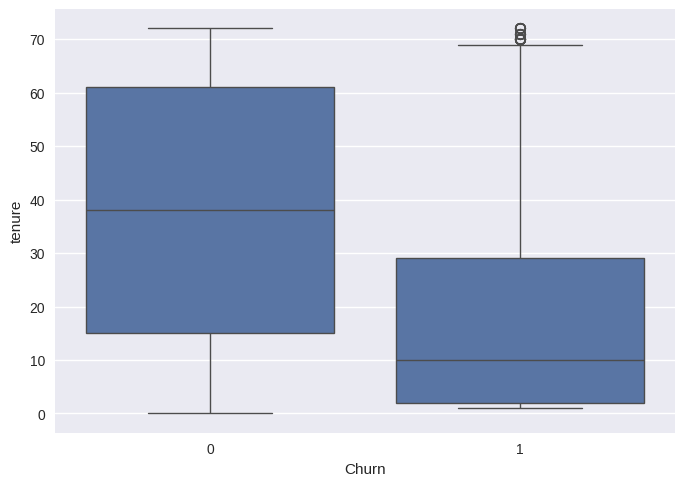

In [261]:
sns.boxplot(x='Churn', y='tenure', data=df);


**75% of churned customers stayed with the company 2.5 years before leaving. 50% of churned customers left in just 10 months.**

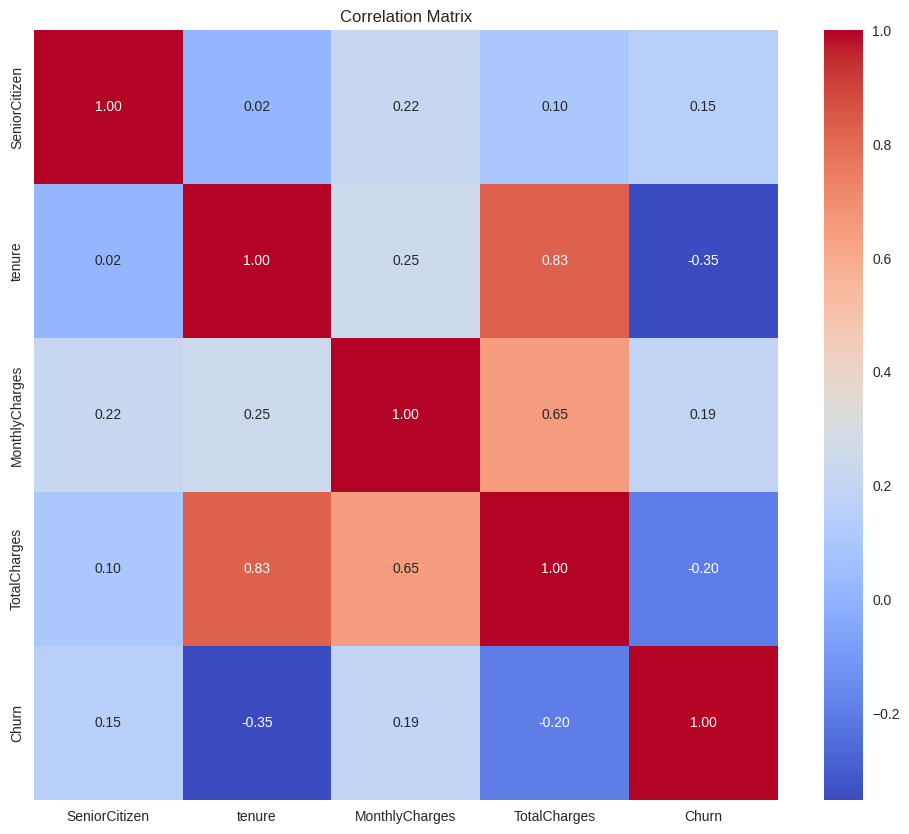

In [262]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**The most correlated attributes are month to month contracts and no online security and no tech support which are positivly correlated with churn , while tenure and two year contracts are negatively correlated with churn.**

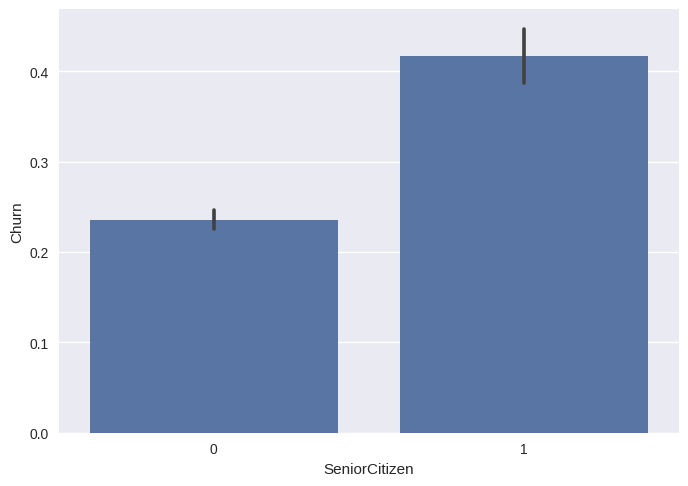

In [263]:
ax = sns.barplot(x='SeniorCitizen', y='Churn', data=df);

**According to the barplot senior citizens are more likely to churn.**

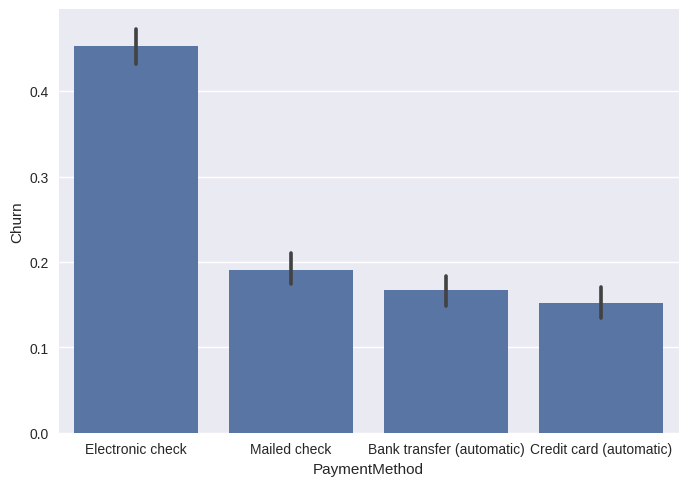

In [264]:
ax = sns.barplot(x='PaymentMethod', y='Churn', data=df)

**According to the barplot Electronic check Payment method has the highet churn rate**

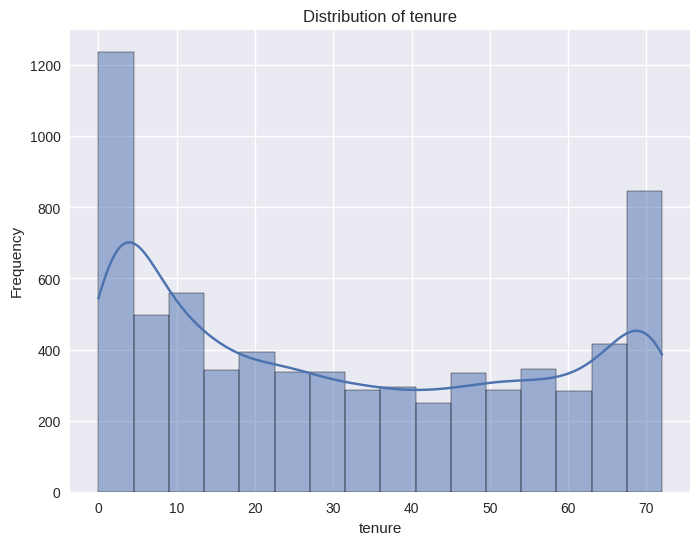

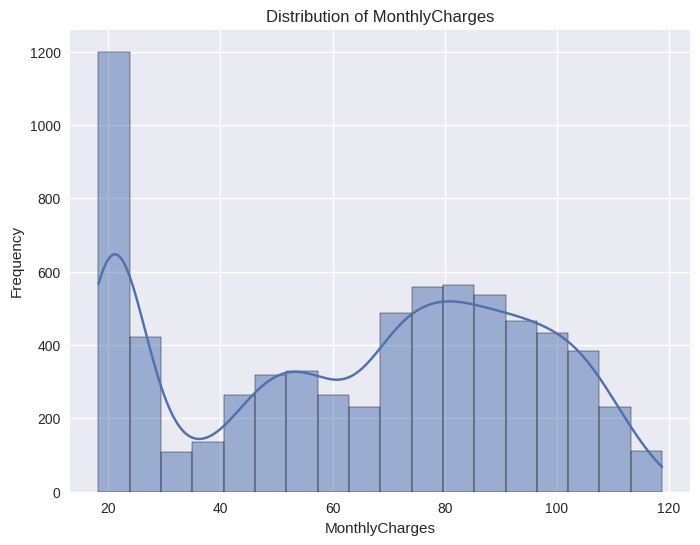

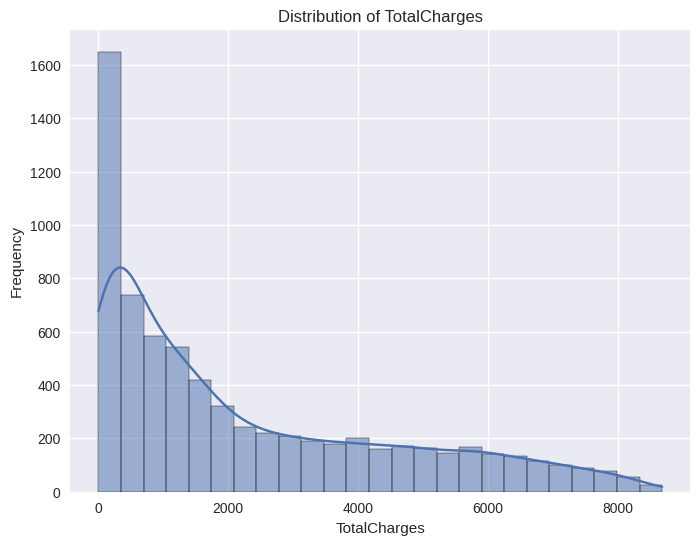

In [265]:
# Histograms for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


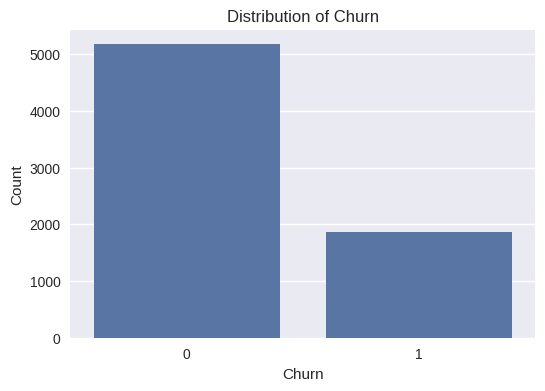

In [266]:
# Checking for class imbalance in the target variable 'Churn'
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.ylabel('Count')
plt.show()

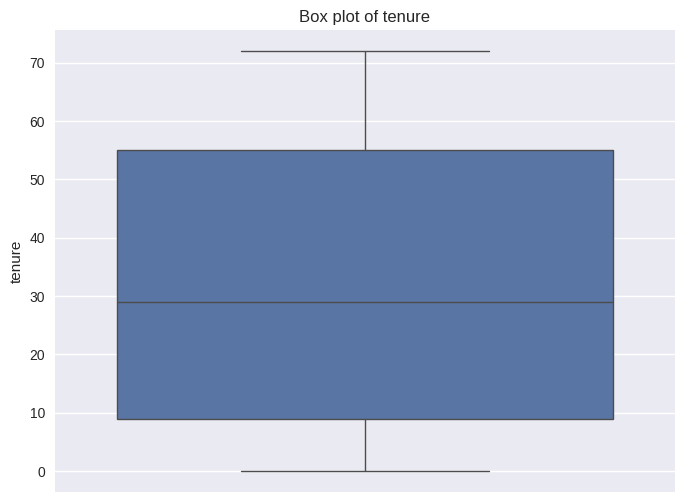

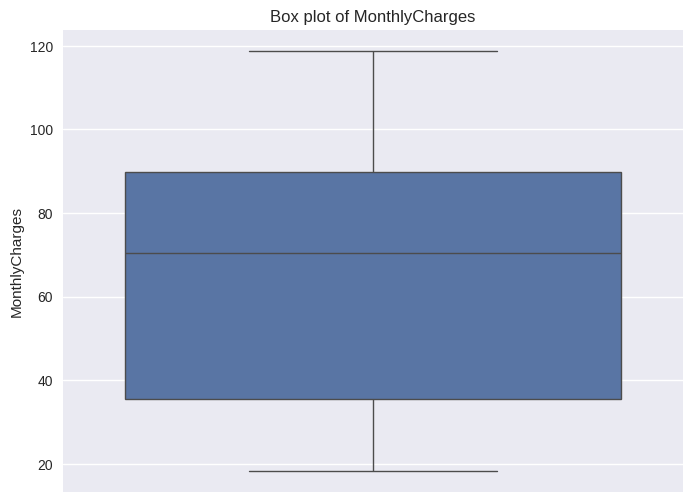

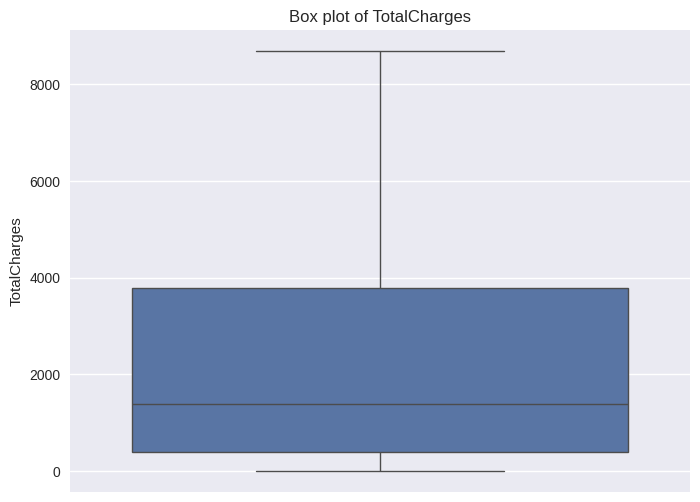

In [267]:
# checking for outliers in numerical columns using box plots
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

## Data Preprocessing

In [268]:
df.drop(['customerID'], axis="columns", inplace=True)

In [269]:
contract_order = ['Month-to-month', 'One year', 'Two year']
df['Contract'] = pd.Categorical(df['Contract'], categories=contract_order, ordered=True)

In [270]:
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
  df[col] = df[col].replace('No internet service', 'No')

In [271]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [272]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [273]:
df_encoded = pd.get_dummies(df, dtype='int8', columns=['PaymentMethod','InternetService'])
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,Female,0,Yes,No,1,No,No,No,Yes,No,...,29.85,29.85,0,0,0,1,0,1,0,0
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,...,56.95,1889.50,0,0,0,0,1,1,0,0
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,...,53.85,108.15,1,0,0,0,1,1,0,0
3,Male,0,No,No,45,No,No,Yes,No,Yes,...,42.30,1840.75,0,1,0,0,0,1,0,0
4,Female,0,No,No,2,Yes,No,No,No,No,...,70.70,151.65,1,0,0,1,0,0,1,0


In [274]:
# Using cat codes on remaining object columns
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Contract']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,0,1,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,0,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,0,1,0,0,1,0


In [275]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_df = df_encoded.select_dtypes(include=np.number)

x_numeric = numeric_df.drop('Churn', axis=1)

VIF_data = pd.DataFrame()
VIF_data['feature'] = x_numeric.columns
VIF_data['VIF'] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

VIF_data

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,gender,1.002108
1,SeniorCitizen,1.153144
2,Partner,1.462668
3,Dependents,1.384239
4,tenure,7.528506
5,PhoneService,34.861595
6,MultipleLines,7.266121
7,OnlineSecurity,6.336051
8,OnlineBackup,6.782395
9,DeviceProtection,6.921742


In [276]:
df_encoded = df_encoded.drop(['MonthlyCharges'], axis=1)
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1889.50,0,0,0,0,1,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,1,108.15,1,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,1840.75,0,1,0,0,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,151.65,1,0,0,1,0,0,1,0


In [277]:
numeric_df = df_encoded.select_dtypes(include=np.number)

x_numeric = numeric_df.drop('Churn', axis=1)

VIF_data = pd.DataFrame()
VIF_data['feature'] = x_numeric.columns
VIF_data['VIF'] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

VIF_data

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,gender,1.001995
1,SeniorCitizen,1.153116
2,Partner,1.462269
3,Dependents,1.384184
4,tenure,7.515658
5,PhoneService,1.423002
6,MultipleLines,1.449403
7,OnlineSecurity,1.480854
8,OnlineBackup,1.474778
9,DeviceProtection,1.546429


In [278]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1) # Independent variable
y = df_encoded['Churn'] # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Training dataset size:', X_train.shape[0])
print('Testing dataset size:', X_test.shape[0])

Training dataset size: 4930
Testing dataset size: 2113


## Modelling & Evaluation

**Calculating the F1 and accuracy values to gain insights on the performance of the model.**

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.58      0.63       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



[[1388  151]
 [ 241  333]]


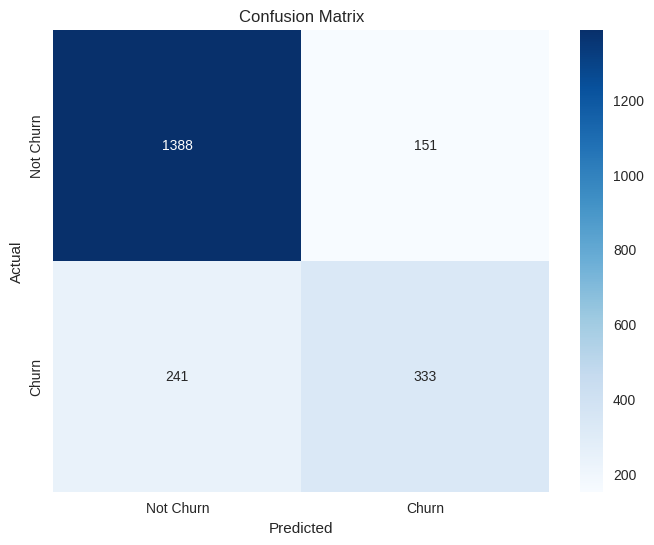

In [280]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### We will apply the Random Forest model and compare between the 2 models with the F1 score since the churn class is more important to us.

In [281]:
from sklearn.ensemble import RandomForestClassifier

random_forest= RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.68      0.48      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.80      0.78      2113



[[1408  131]
 [ 301  273]]


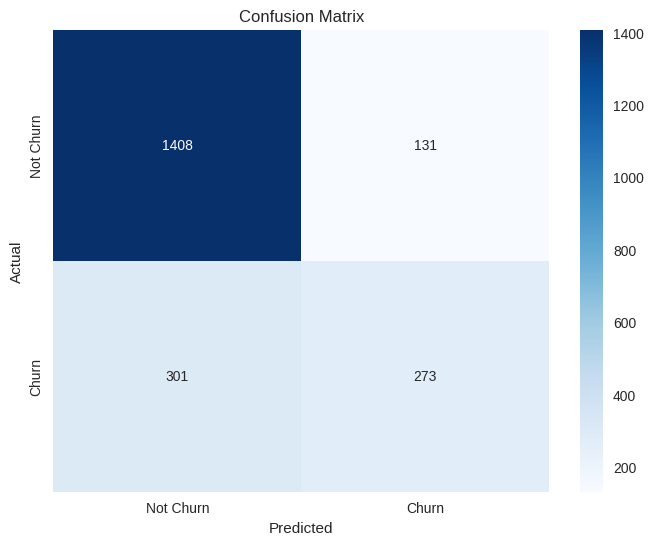

In [282]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### According to the F1 score and the accuracy score the logistic regression model performs better than the random forest model in both f1 score and accuracy score.


### Advanced Model Performance Evaluation: XGBoost vs. CatBoost

In [288]:
import xgboost as xgb

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model using F1 score and accuracy
f1_xgb = f1_score(y_test, y_pred_xgb)
accuracy_xgb = xgb_model.score(X_test, y_test)

print(f'XGBoost F1 Score: {f1_xgb}')
print(f'XGBoost Accuracy: {accuracy_xgb}')

XGBoost F1 Score: 0.5716945996275605
XGBoost Accuracy: 0.7823000473260767


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1539
           1       0.61      0.53      0.57       574

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113

[[1346  193]
 [ 267  307]]


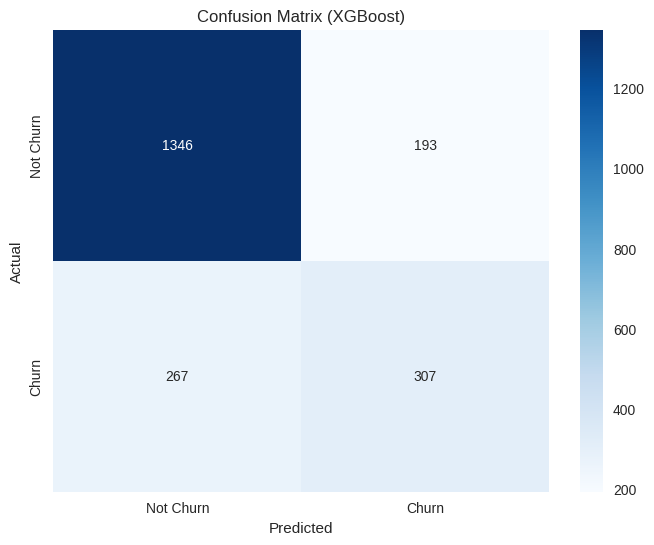

In [289]:

print(classification_report(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

In [284]:
#!pip install catboost

from catboost import CatBoostClassifier

# Identify categorical features in the original df dataframe
categorical_features_indices = [df.columns.get_loc(col) for col in df.select_dtypes(include=['object','category']).columns]

# Split the original df dataframe
X_original = df.drop('Churn', axis=1)
y_original = df['Churn']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.3, random_state=42)

# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0) # verbose=0 to suppress output

# Train the model on the original data
catboost_model.fit(X_train_orig, y_train_orig, cat_features=categorical_features_indices)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test_orig)

# Evaluate the model
f1_catboost = f1_score(y_test_orig, y_pred_catboost)
accuracy_catboost = catboost_model.score(X_test_orig, y_test_orig)

print(f"CatBoost F1 Score: {f1_catboost}")
print(f"CatBoost Accuracy: {accuracy_catboost}")


CatBoost F1 Score: 0.597478176527643
CatBoost Accuracy: 0.8035967818267865



CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.54      0.60       574

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113


CatBoost Confusion Matrix:
[[1390  149]
 [ 266  308]]


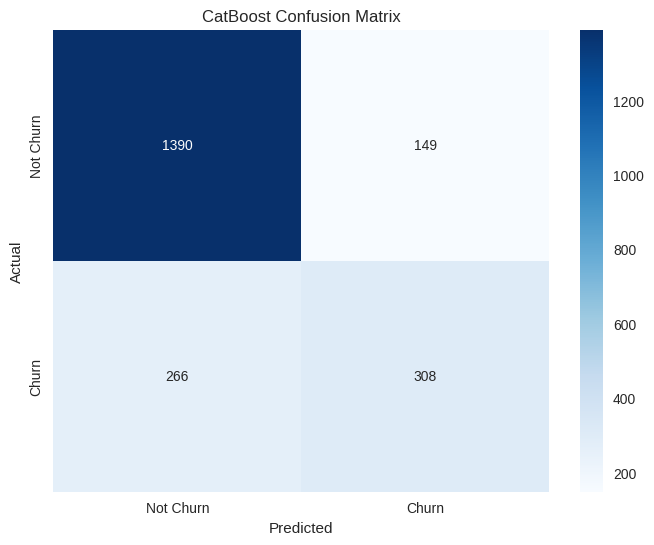

In [287]:
# Print classification report for CatBoost
print("\nCatBoost Classification Report:")
print(classification_report(y_test_orig, y_pred_catboost))

# Print confusion matrix for CatBoost
cm_catboost = confusion_matrix(y_test_orig, y_pred_catboost)
print("\nCatBoost Confusion Matrix:")
print(cm_catboost)

# Plot confusion matrix for CatBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()

In [290]:
from sklearn.metrics import roc_curve, roc_auc_score
# Get predicted probabilities for the positive class (Churn=1)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
# Need to predict on the original test set for CatBoost as it was trained on it
y_prob_catboost = catboost_model.predict_proba(X_test_orig)[:, 1]
# Calculate ROC curves
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test_orig, y_prob_catboost)
# Calculate AUC scores
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
auc_catboost = roc_auc_score(y_test_orig, y_prob_catboost)

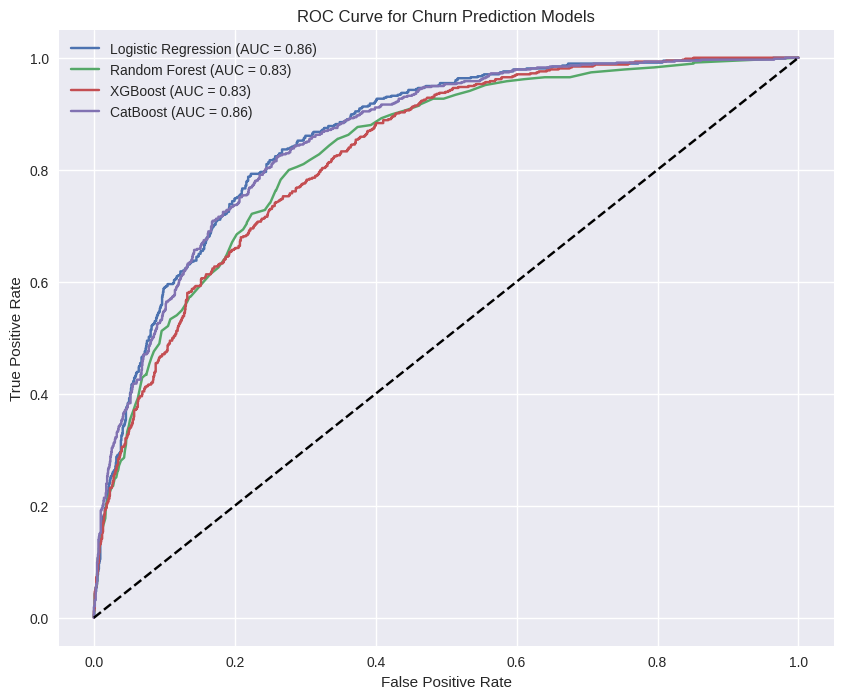

AUC for Logistic Regression: 0.86
AUC for Random Forest: 0.83
AUC for XGBoost: 0.83
AUC for CatBoost: 0.86


In [291]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {auc_catboost:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction Models')
plt.legend()
plt.show()
# Print AUC scores
print(f'AUC for Logistic Regression: {auc_lr:.2f}')
print(f'AUC for Random Forest: {auc_rf:.2f}')
print(f'AUC for XGBoost: {auc_xgb:.2f}')
print(f'AUC for CatBoost: {auc_catboost:.2f}')


Class distribution after SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


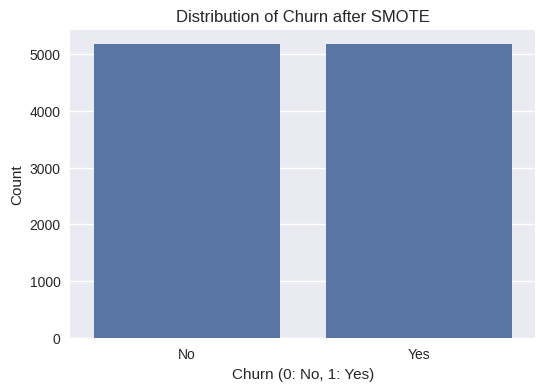

In [209]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())
print(y_resampled.value_counts(normalize=True) * 100)

# Visualize the new class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Distribution of Churn after SMOTE')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)



In [211]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)




print(f'vv is {f1_score(y_test, y_pred)} and {lr_model.score(X_test, y_test)}')


vv is 0.8440842787682334 and 0.8450885668276973


In [212]:
random_forest= RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
f1_score(y_test, y_pred)
random_forest.score(X_test, y_test)
print(f'vv is {f1_score(y_test, y_pred)} and {random_forest.score(X_test, y_test)}')

vv is 0.842937108989134 and 0.8463768115942029


In [213]:
# prompt: create a catboost and xgboost models using cross validation and evaluate using confusion matrix percesion recall and ROC-auc

#!pip install catboost
#!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from catboost import CatBoostClassifier, Pool
import xgboost as xgb

# Assuming df_encoded and the train/test splits (X_train, X_test, y_train, y_test) are already defined from the preceding code

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- CatBoost Model ---
print("--- Training CatBoost Model ---")
# Identify categorical features for CatBoost
# Need to use the original dataframe before one-hot encoding to identify original categorical columns
# Then map these to the columns in df_encoded
original_categorical_cols = [col for col in df.columns if df[col].dtype == object]
# Find the corresponding encoded columns in df_encoded
# For one-hot encoded data, CatBoost might not perform as well as it's designed for categorical features
# Let's identify the indices of the one-hot encoded columns that originated from categorical features
# This is a bit tricky with automatic get_dummies, a better approach is to use CatBoost directly on original data
# if possible, or identify the columns manually if few.
# For simplicity with existing df_encoded, we will treat all features as potentially numerical/binary,
# but CatBoost can still handle this.
# Alternatively, rebuild the data pipeline to use CatBoost's internal handling of categoricals.
# Let's assume for now that df_encoded is our feature set and we don't pass specific cat_features indices.
# If you had the original dataframe (df) and target (y_original), you could do:
# train_pool = Pool(data=df[original_numerical_cols + original_categorical_cols],
#                   label=y_original,
#                   cat_features=original_categorical_cols)
# test_pool = Pool(data=df_test[original_numerical_cols + original_categorical_cols],
#                  label=y_test_original,
#                  cat_features=original_categorical_cols)
# For now, using df_encoded:

catboost_model = CatBoostClassifier(iterations=500,
                                    learning_rate=0.1,
                                    depth=6,
                                    loss_function='Logloss',
                                    eval_metric='AUC',
                                    random_state=42,
                                    verbose=False)

# Cross-validation for CatBoost
catboost_cv_scores = cross_val_score(catboost_model, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"CatBoost Cross-Validation ROC-AUC scores: {catboost_cv_scores}")
print(f"CatBoost Mean CV ROC-AUC: {np.mean(catboost_cv_scores):.4f}")

# Train CatBoost on the full training data
catboost_model.fit(X_train, y_train)

# Evaluate CatBoost on the test set
y_pred_catboost = catboost_model.predict(X_test)
y_pred_proba_catboost = catboost_model.predict_proba(X_test)[:, 1]

print("\n--- CatBoost Model Evaluation on Test Set ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))
print(f"Precision: {precision_score(y_test, y_pred_catboost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_catboost):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_catboost):.4f}")




--- Training CatBoost Model ---
CatBoost Cross-Validation ROC-AUC scores: [0.92682708 0.92901711 0.9281712  0.93213809 0.93401919]
CatBoost Mean CV ROC-AUC: 0.9300

--- CatBoost Model Evaluation on Test Set ---
Confusion Matrix:
[[1353  221]
 [ 233 1298]]
Precision: 0.8545
Recall: 0.8478
ROC-AUC: 0.9312


In [214]:
# --- XGBoost Model ---
print("\n--- Training XGBoost Model ---")

xgboost_model = xgb.XGBClassifier(objective='binary:logistic',
                                  n_estimators=100, # Reduced for faster execution
                                  learning_rate=0.1,
                                  max_depth=6,
                                  eval_metric='logloss', # Or 'auc'
                                  random_state=42)

# Cross-validation for XGBoost
xgboost_cv_scores = cross_val_score(xgboost_model, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"XGBoost Cross-Validation ROC-AUC scores: {xgboost_cv_scores}")
print(f"XGBoost Mean CV ROC-AUC: {np.mean(xgboost_cv_scores):.4f}")

# Train XGBoost on the full training data
xgboost_model.fit(X_train, y_train)

# Evaluate XGBoost on the test set
y_pred_xgboost = xgboost_model.predict(X_test)
y_pred_proba_xgboost = xgboost_model.predict_proba(X_test)[:, 1]

print("\n--- XGBoost Model Evaluation on Test Set ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgboost))
print(f"Precision: {precision_score(y_test, y_pred_xgboost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgboost):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgboost):.4f}")



--- Training XGBoost Model ---
XGBoost Cross-Validation ROC-AUC scores: [0.92690139 0.92973727 0.93372485 0.93001755 0.93235462]
XGBoost Mean CV ROC-AUC: 0.9305

--- XGBoost Model Evaluation on Test Set ---
Confusion Matrix:
[[1338  236]
 [ 208 1323]]
Precision: 0.8486
Recall: 0.8641
ROC-AUC: 0.9315



--- Plotting ROC Curves ---


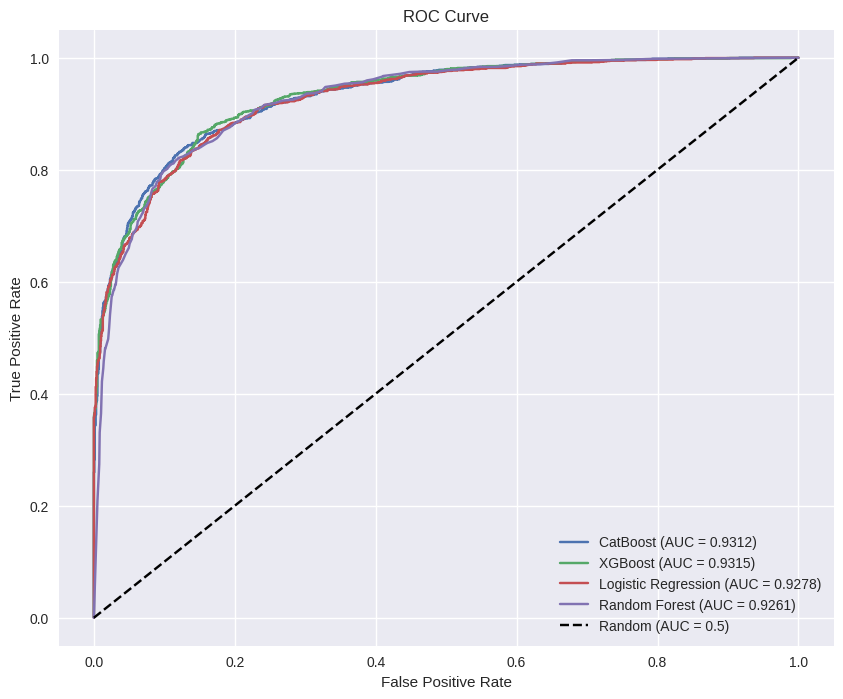


Models Trained, Cross-Validated, and Evaluated.


In [215]:
# --- Plotting ROC Curves ---
print("\n--- Plotting ROC Curves ---")

fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_pred_proba_catboost)
auc_catboost = roc_auc_score(y_test, y_pred_proba_catboost)

fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_pred_proba_xgboost)
auc_xgboost = roc_auc_score(y_test, y_pred_proba_xgboost)

# Assuming Logistic Regression and Random Forest models were trained earlier in the notebook
# Let's get their probabilities to plot ROC curves as well for comparison
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)


plt.figure(figsize=(10, 8))
plt.plot(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {auc_catboost:.4f})')
plt.plot(fpr_xgboost, tpr_xgboost, label=f'XGBoost (AUC = {auc_xgboost:.4f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("\nModels Trained, Cross-Validated, and Evaluated.")